In [7]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Ensure backend is set to 'Agg'
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # In case only plt is imported
%matplotlib inline

import seaborn as sns

# For predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set seaborn style for better aesthetics
sns.set(style='whitegrid')

In [9]:
df1 = pd.read_csv('/content/drive/MyDrive/Student Stress Factors.csv',
                  delimiter=',',
                  encoding='MacRoman')

# Load the second data file which does not have the Timestamp column
df2 = pd.read_csv('/content/drive/MyDrive/Student Stress Factors.csv',
                  delimiter=',',
                  encoding='MacRoman')

# Display the first few rows of each (actual display will happen when the notebook is run)
print('df1 columns:', df1.columns.tolist())
print('df2 columns:', df2.columns.tolist())

df1 columns: ['Timestamp', 'Kindly Rate your Sleep Quality \uf8ffüò¥', 'How many times a week do you suffer headaches \uf8ffü§ï?', 'How would you rate you academic performance \uf8ffüë©‚Äç\uf8ffüéì?', 'how would you rate your study load?', 'How many times a week you practice extracurricular activities \uf8ffüéæ?', 'How would you rate your stress levels?']
df2 columns: ['Timestamp', 'Kindly Rate your Sleep Quality \uf8ffüò¥', 'How many times a week do you suffer headaches \uf8ffü§ï?', 'How would you rate you academic performance \uf8ffüë©‚Äç\uf8ffüéì?', 'how would you rate your study load?', 'How many times a week you practice extracurricular activities \uf8ffüéæ?', 'How would you rate your stress levels?']


In [10]:
df1.columns = [col.strip() for col in df1.columns]
df2.columns = [col.strip() for col in df2.columns]

# For df1, the 'Timestamp' column is supposed to represent dates. Let's attempt to convert it.
if 'Timestamp' in df1.columns:
    try:
        df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
    except Exception as e:
        print('Error converting Timestamp column:', e)
        # This method is important in many notebooks since improper date parsing can affect temporal analyses.

# A peek into the cleaned columns
print('Cleaned df1 columns:', df1.columns.tolist())
print('Cleaned df2 columns:', df2.columns.tolist())

Cleaned df1 columns: ['Timestamp', 'Kindly Rate your Sleep Quality \uf8ffüò¥', 'How many times a week do you suffer headaches \uf8ffü§ï?', 'How would you rate you academic performance \uf8ffüë©‚Äç\uf8ffüéì?', 'how would you rate your study load?', 'How many times a week you practice extracurricular activities \uf8ffüéæ?', 'How would you rate your stress levels?']
Cleaned df2 columns: ['Timestamp', 'Kindly Rate your Sleep Quality \uf8ffüò¥', 'How many times a week do you suffer headaches \uf8ffü§ï?', 'How would you rate you academic performance \uf8ffüë©‚Äç\uf8ffüéì?', 'how would you rate your study load?', 'How many times a week you practice extracurricular activities \uf8ffüéæ?', 'How would you rate your stress levels?']


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Timestamp                                                            53 non-null     datetime64[ns]
 1   Kindly Rate your Sleep Quality üò¥                                  53 non-null     int64         
 2   How many times a week do you suffer headaches ü§ï?                  53 non-null     int64         
 3   How would you rate you academic performance üë©‚Äçüéì?             53 non-null     int64         
 4   how would you rate your study load?                                  53 non-null     int64         
 5   How many times a week you practice extracurricular activities üéæ?  53 non-null     int64         
 6   How would you rate your stress levels

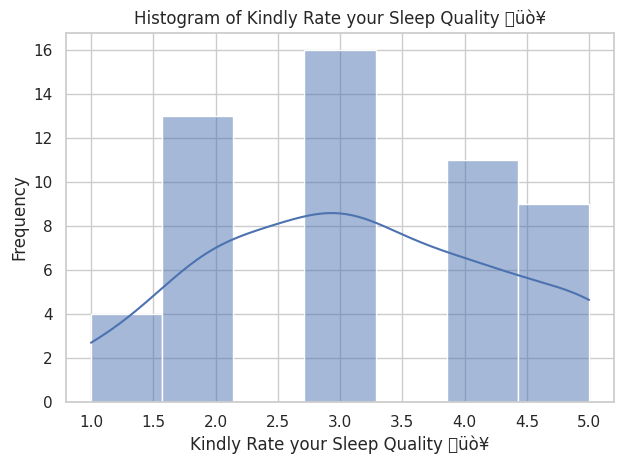

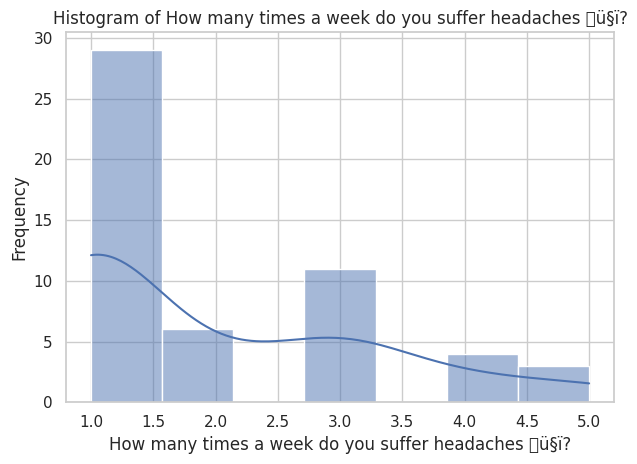

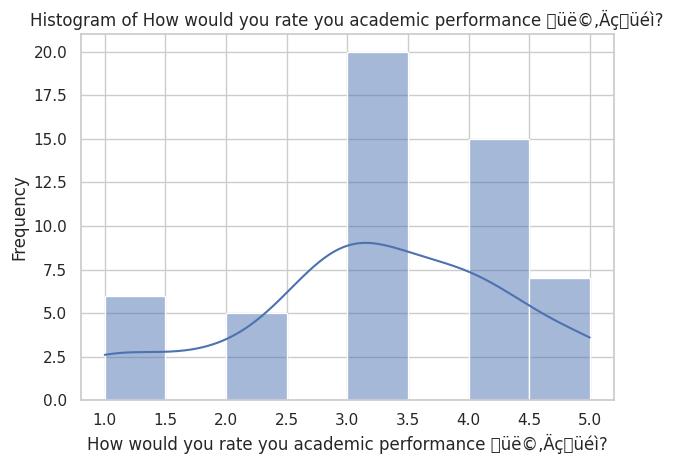

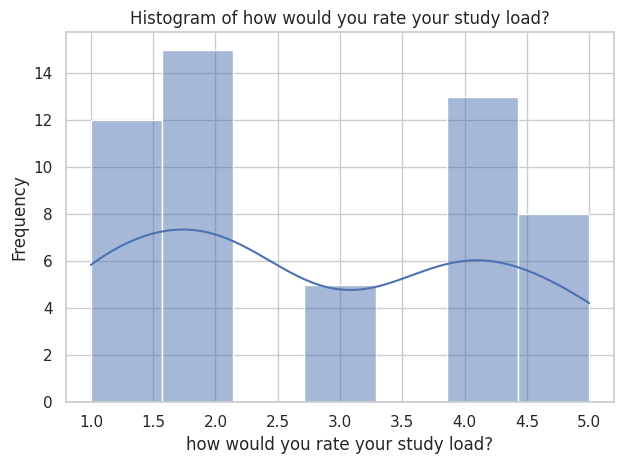

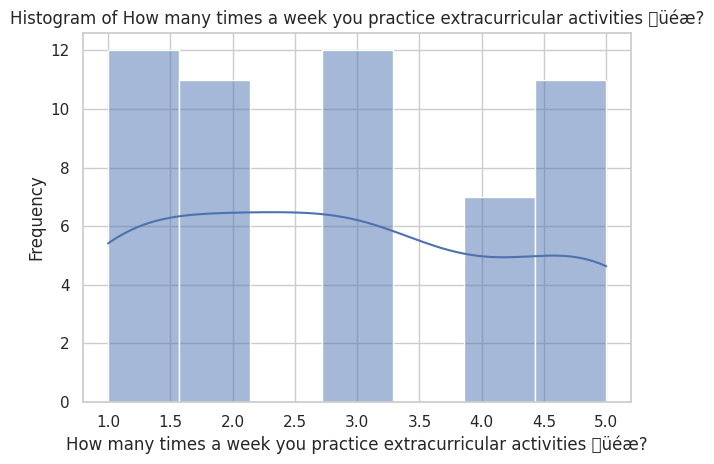

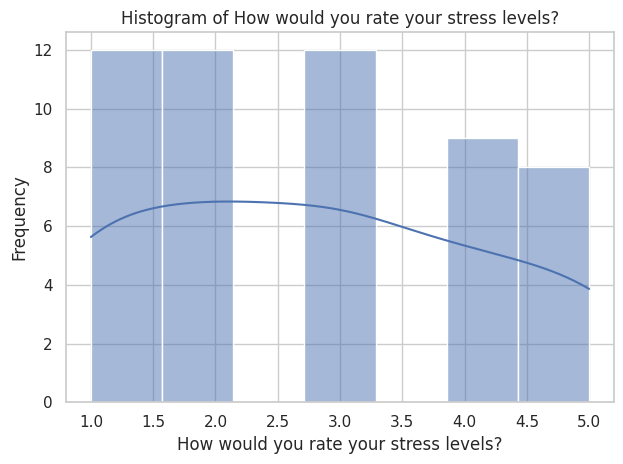

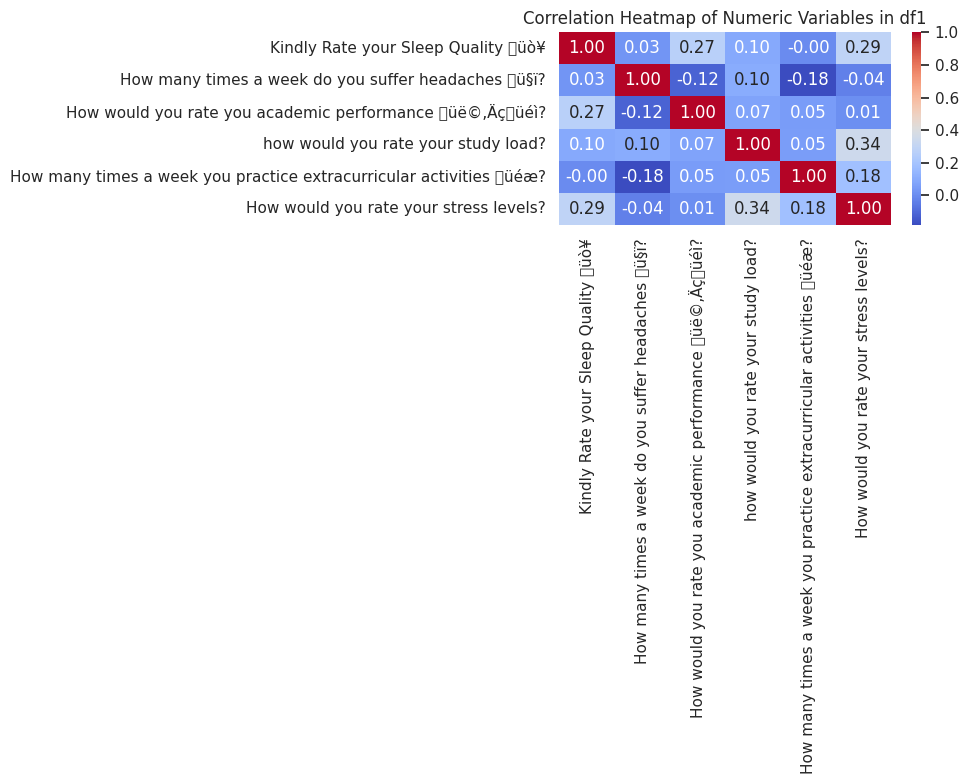

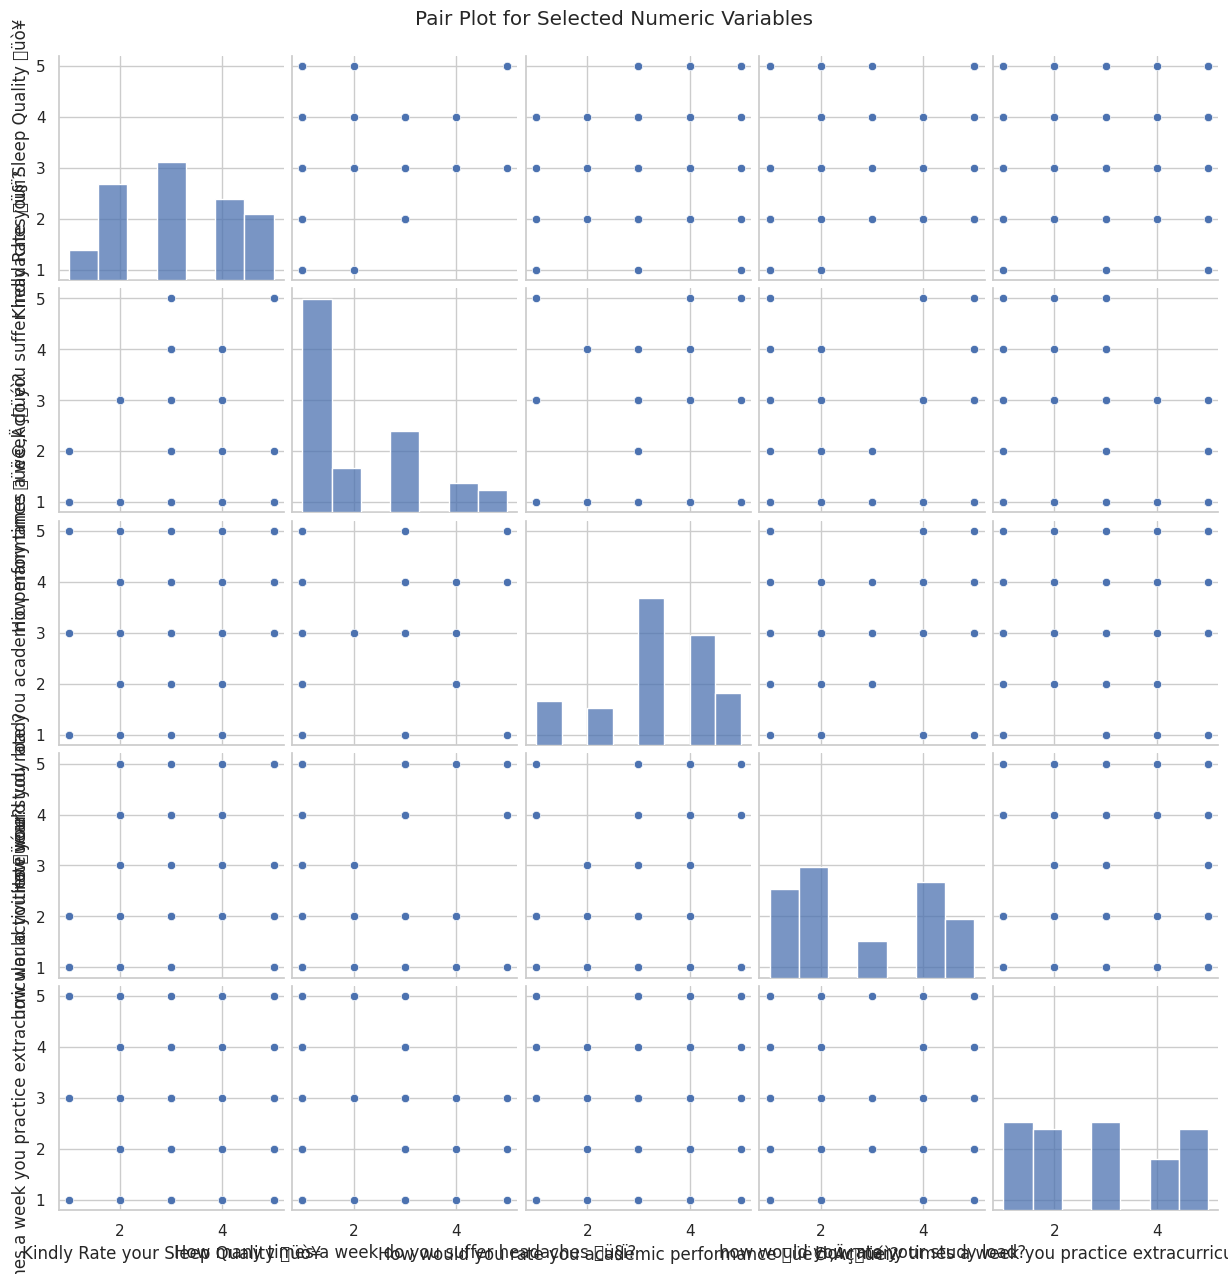

In [13]:
print('DataFrame Info:')
df1.info()

# Check summary statistics
print('Summary Statistics:')
print(df1.describe())

# Plot histograms for the numeric columns
numeric_cols_df1 = df1.select_dtypes(include=[np.number]).columns
for col in numeric_cols_df1:
    plt.figure()
    sns.histplot(df1[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# If there are four or more numeric columns, create a correlation heatmap
if len(numeric_cols_df1) >= 4:
    numeric_df1 = df1[numeric_cols_df1]
    plt.figure(figsize=(10, 8))
    corr = numeric_df1.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Variables in df1')
    plt.tight_layout()
    plt.show()

# Create a pair plot for a subset of columns due to potential visual clutter
cols_for_pairplot = numeric_cols_df1 if len(numeric_cols_df1) <= 5 else numeric_cols_df1[:5]
sns.pairplot(df1[cols_for_pairplot])
plt.suptitle('Pair Plot for Selected Numeric Variables', y=1.02)
plt.show()